In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

### Total no. of artifacts in dataset

In [2]:
DATASET_NAME = 'dataset-rgbd-Train-2021-09-01-14-43-45'
DATASET_PATH = Path(f'/mnt/datasets/{DATASET_NAME}')

In [3]:
SAMPLE_PICKLE_PATH = 'scans/00b12500-0720-11ec-abef-3b31a036edc6/100/pc_00b5b8e1-0720-11ec-abef-03496a06c55c_2021-08-27-10-16-39-550078_100_1.p'
!ls /mnt/datasets/{DATASET_NAME}/{SAMPLE_PICKLE_PATH}
# ab575ae5-eecc-11eb-af66-e3654568dc70/100/pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p

/mnt/datasets/dataset-rgbd-Train-2021-09-01-14-43-45/scans/00b12500-0720-11ec-abef-3b31a036edc6/100/pc_00b5b8e1-0720-11ec-abef-03496a06c55c_2021-08-27-10-16-39-550078_100_1.p


In [7]:
!du /mnt/datasets/{DATASET_NAME} -sh --apparent-size

3.5G	/mnt/datasets/dataset-rgbd-Train-2021-09-01-14-43-45


In [6]:
# Check resolution of rgbd
for fpath_pickle in tqdm(DATASET_PATH.glob('**/*.p')):
    rgbd, targets = pickle.load(open(fpath_pickle, "rb"))
    assert rgbd.shape == (240, 180, 4), fpath_pickle

5398it [02:47, 32.29it/s]


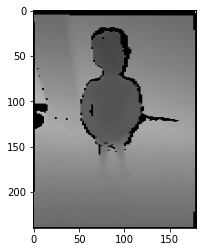

In [82]:
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
_ = plt.imshow(np.squeeze(rgbd[:, :, 0]), cmap='gray')
plt.show()

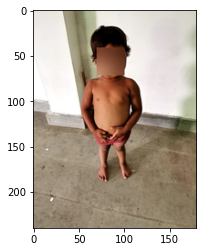

In [83]:
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
_ = plt.imshow(np.squeeze(rgbd[:, :, 1:]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(240, 180, 3)


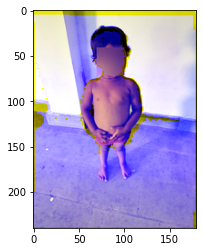

In [84]:
# Visualize R, G and depth layer
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
rgd = np.stack([rgbd[:, :, 1], rgbd[:, :, 2], rgbd[:, :, 0]*6.], axis=2)
print(rgd.shape)
_ = plt.imshow(np.squeeze(rgd))
plt.show()

In [85]:
rgbd[:, :, 0].min(), rgbd[:, :, 0].max()

(0.0, 0.30573332)

In [86]:
print("targets: ", targets)
print("rgbd.shape: ", rgbd.shape)

targets:  {'file_path': '1630059399551/a6681bfe-91ad-4882-84c1-1435bdfa33a8', 'timestamp': '2021-08-27-10-16-39-550078', 'scan_id': '00b5b8e1-0720-11ec-abef-03496a06c55c', 'scan_step': 100, 'scan_version': 'v0.9', 'height': 91.8, 'weight': 13.75, 'muac': 16.7, 'order_number': 1, 'format': 'rgbd', 'device_model': 'HUAWEI VOG-L29', 'person_id': '00b12500-0720-11ec-abef-3b31a036edc6', 'age': 988, 'sex': 'female', 'file_path_rgb': '1630059401191/ba3e2361-2ea8-46c7-bd51-0fda0a221ad8', 'rgb_timestamp': '2021-08-27-10-16-41-206390', 'device_pose': [-0.6452987385023857, -0.7494033280146211, 0.14827066482564838, 0.0, 0.25750963690180606, -0.030654270360625752, 0.9657893676218213, 0.0, -0.7192206372108141, 0.6614037856478203, 0.212759740883473, 0.0, -0.04128752, -0.06830936, -0.053185105, 1.0], 'raw_header': '240x180_0.001_7_-0.20772326_0.5920061_0.68715227_-0.3663355_0.04128752_0.06830936_0.053185105', 'angle': -41.40702153504466}
rgbd.shape:  (240, 180, 4)


In [87]:
artifacts = pd.read_csv(DATASET_PATH / 'labels.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 5398


,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,file_path_rgb,rgb_timestamp
0,1630061040088/f493c35b-6227-4efa-8cf3-3c7ab88e...,2021-08-27-10-44-00-100435,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,1,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041358/71ef9fdb-063b-4099-b983-0c152ba1...,2021-08-27-10-44-01-366118
1,1630061040204/a844ae82-3140-46a8-bba6-f8316d50...,2021-08-27-10-44-00-209814,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,2,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041497/0764bd65-7e35-4f2f-9238-40504602...,2021-08-27-10-44-01-506719
2,1630061040339/ff251cfe-ddcb-48e4-8070-47dfbdb9...,2021-08-27-10-44-00-350436,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,3,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041622/033cc235-f67c-4b73-9aed-5ce4d40f...,2021-08-27-10-44-01-631710
3,1630061040458/31e74f27-d026-47b9-924a-c300e69d...,2021-08-27-10-44-00-459772,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,4,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041764/4cf79d24-6172-43b9-99c3-31792c80...,2021-08-27-10-44-01-772279
4,1630061040614/f7e0d697-edda-43f2-be64-62ea8e1b...,2021-08-27-10-44-00-616014,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,5,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041894/9c9002c5-1c74-4b02-adca-bcbd01c5...,2021-08-27-10-44-01-912950


In [88]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,file_path_rgb,rgb_timestamp,Years
0,1630061040088/f493c35b-6227-4efa-8cf3-3c7ab88e...,2021-08-27-10-44-00-100435,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,1,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041358/71ef9fdb-063b-4099-b983-0c152ba1...,2021-08-27-10-44-01-366118,4
1,1630061040204/a844ae82-3140-46a8-bba6-f8316d50...,2021-08-27-10-44-00-209814,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,2,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041497/0764bd65-7e35-4f2f-9238-40504602...,2021-08-27-10-44-01-506719,4
2,1630061040339/ff251cfe-ddcb-48e4-8070-47dfbdb9...,2021-08-27-10-44-00-350436,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,3,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041622/033cc235-f67c-4b73-9aed-5ce4d40f...,2021-08-27-10-44-01-631710,4
3,1630061040458/31e74f27-d026-47b9-924a-c300e69d...,2021-08-27-10-44-00-459772,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,4,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041764/4cf79d24-6172-43b9-99c3-31792c80...,2021-08-27-10-44-01-772279,4
4,1630061040614/f7e0d697-edda-43f2-be64-62ea8e1b...,2021-08-27-10-44-00-616014,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,5,rgbd,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,1630061041894/9c9002c5-1c74-4b02-adca-bcbd01c5...,2021-08-27-10-44-01-912950,4


### Total no. of children in the dataset

In [89]:
print("Total no. of artifacts:", len(artifacts))
unique_scan_ids = artifacts.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = artifacts.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 5398
Total no. of unique scan ids: 573
Total no. of unique person ids: 152


HUAWEI VOG-L29    5398
Name: device_model, dtype: int64


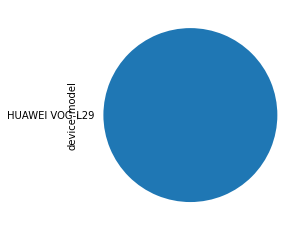

In [90]:
print(artifacts['device_model'].value_counts())
_ = artifacts['device_model'].value_counts().plot(kind='pie')

v0.9      5017
v1.0.2     318
v0.8        63
Name: scan_version, dtype: int64


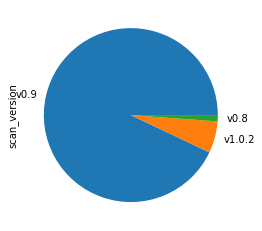

In [91]:
print(artifacts['scan_version'].value_counts())
_ = artifacts['scan_version'].value_counts().plot(kind='pie')

0     1
1    21
2    42
3    39
4    49
Name: Years, dtype: int64


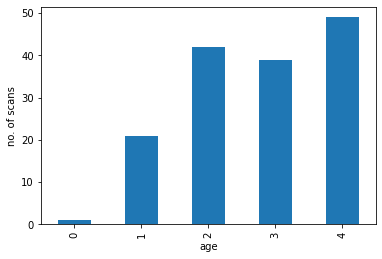

In [92]:
draw_age_distribution(unique_person_ids)

0      2
1     40
2    123
3    140
4    268
Name: Years, dtype: int64


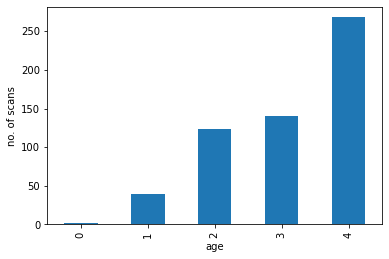

In [93]:
draw_age_distribution(unique_scan_ids)

100    2735
102    2663
Name: scan_step, dtype: int64


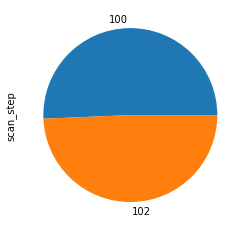

In [94]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['scan_step'].value_counts())
_ = artifacts['scan_step'].value_counts().plot(kind='pie')

In [95]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(artifacts, scan_type_colname)

2021-09-01 14:50:29,150 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/mhinsche1/code/Users/mhinsche/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,7,196,524,657,1279
100,9,160,568,692,1306


In [96]:
calculate_code_age_distribution(unique_scan_ids, scan_type_colname)

2021-09-01 14:50:30,973 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/mhinsche1/code/Users/mhinsche/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,1,21,61,71,131
100,1,19,62,69,137


### Distribution of height, weight and age against each other

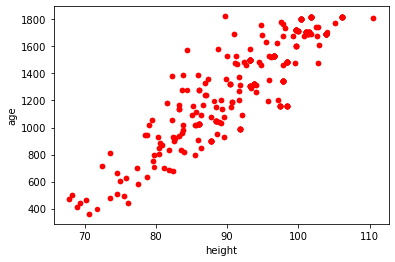

In [97]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')


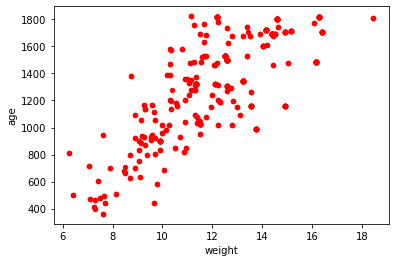

In [98]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

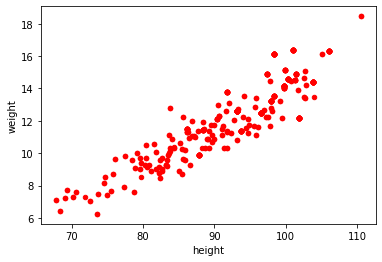

In [99]:
## distribution of height against weight
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [100]:
artifacts.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000
mean,100.986662,92.838440,12.282394,14.364728,5.889033,1340.343275,3.135791
std,1.000004,8.441436,2.289717,1.211914,4.002744,360.062336,0.976419
min,100.000000,67.800000,6.250000,11.100000,1.000000,361.000000,0.000000
25%,100.000000,87.100000,10.900000,13.500000,3.000000,1057.000000,2.000000
50%,100.000000,93.700000,12.250000,14.300000,5.000000,1361.000000,3.000000
75%,102.000000,99.700000,14.150000,14.900000,8.000000,1692.000000,4.000000
max,102.000000,110.500000,18.459000,17.000000,27.000000,1823.000000,4.000000


In [101]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,100.994764,92.577312,12.254133,14.374346,1.089005,1326.445026,3.102967
std,1.000860,8.573763,2.332003,1.215498,0.659069,365.909179,0.992036
min,100.000000,67.800000,6.250000,11.100000,1.000000,361.000000,0.000000
25%,100.000000,86.600000,10.800000,13.500000,1.000000,1051.000000,2.000000
50%,100.000000,93.700000,12.250000,14.300000,1.000000,1343.000000,3.000000
75%,102.000000,99.700000,14.150000,15.000000,1.000000,1691.000000,4.000000
max,102.000000,110.500000,18.459000,17.000000,10.000000,1823.000000,4.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [103]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [104]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [105]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [106]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 0


[]

In [107]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) Check height

In [108]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [109]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]